In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('seaborn-darkgrid')

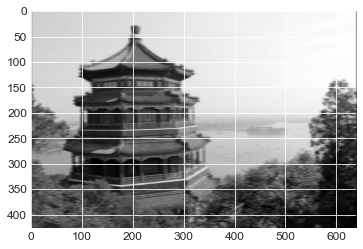

In [5]:
# !pip install Pillow
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255
images = np.array([china, flower])
# 흐르는 데이터는 (미니배치크기, 높이, 너비, 채널 수) 4차원 텐서
batch_size, height, width, channels = images.shape

# 필터 2개 만들기
# 3차원 필터[행,열,채널]가 2개  => 4차원 텐서로 정의할 수 있음
filters = np.zeros(shape = (7, 7, channels, 2), dtype = np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

outputs = tf.nn.conv2d(images, filters, strides = 1, padding = "SAME")

plt.imshow(outputs[0,:,:,1], cmap = "gray") # 첫 번째 이미지의 두 번째 특성맵 시각화
plt.show()

필터를 직접 지정하는 경우는 거의없음.  
실제 CNN에서는 훈련 가능한 변수로 필터를 정의  
keras.layers.Conv2D층 사용하기

In [6]:
conv = keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = 1,
                           padding = "same", activation = "relu")